In [1]:
import sys
sys.path.append('../..')

In [2]:
from pde.grids import UnitGrid
from pde.fields import ScalarField, VectorField, FieldCollection
from pde.pdes import *

# create a random initial condition
grid = UnitGrid([64, 64])
field = ScalarField.random_uniform(grid, -1, 1)

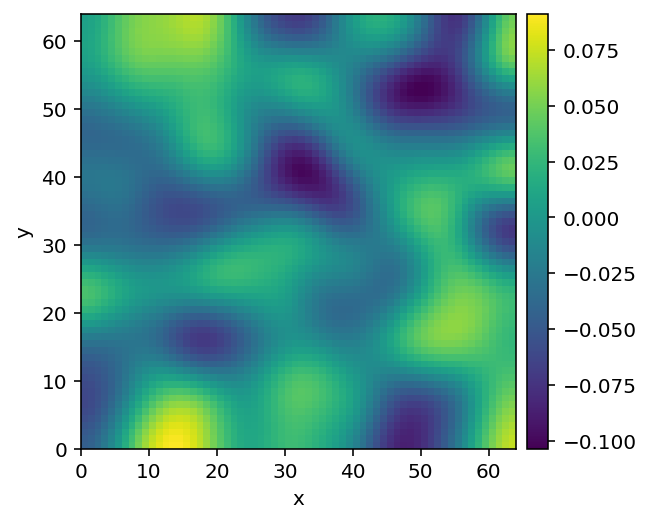

In [3]:
# solve the diffusion equation
eq = DiffusionPDE()
sol = eq.solve(field, t_range=10, dt=1e-3)
sol.plot(colorbar=True);

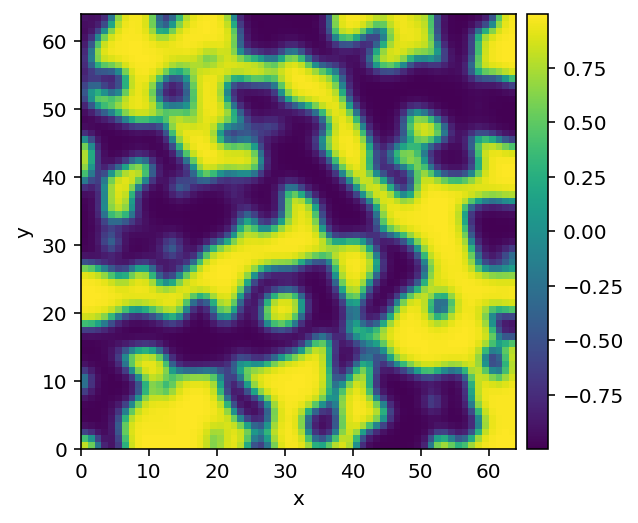

In [4]:
# solve the Allen-Cahn equation 
eq = AllenCahnPDE(interface_width=0.5)
sol = eq.solve(field, t_range=5, dt=1e-3)
sol.plot(colorbar=True);

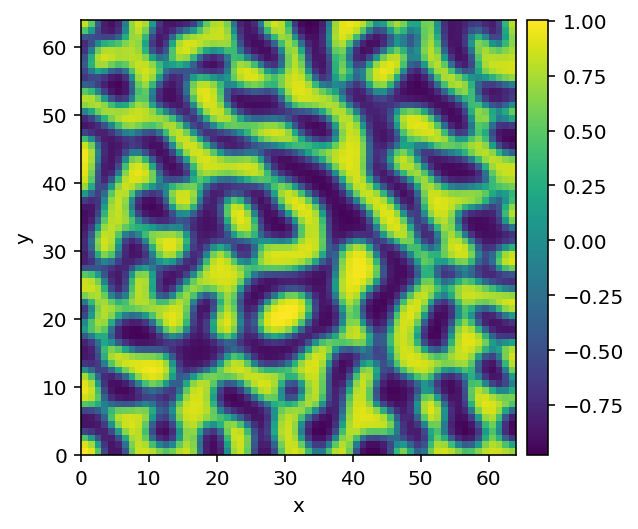

In [5]:
# solve the Cahn-Hilliard equation 
eq = CahnHilliardPDE(interface_width=0.5)
sol = eq.solve(field, t_range=10, dt=1e-3)
sol.plot(colorbar=True);

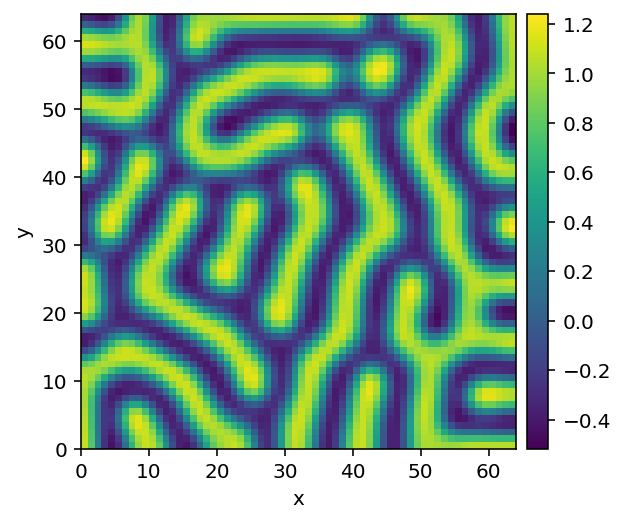

In [6]:
# solve the Swift-Hohenberg equation 
eq = SwiftHohenbergPDE(rate=0.1, kc2=0.5, delta=1.)
sol = eq.solve(field, t_range=1e2, dt=1e-2)
sol.plot(colorbar=True);

In [7]:
# create a custom PDE by implementing the python version of the evolution rate
from pde.pdes.base import PDEBase

class ChafeeInfantePDE(PDEBase):
    """ minimal model of a custom pde
    
    Taken from https://en.wikipedia.org/wiki/Chafee–Infante_equation
    """
    
    def __init__(self, λ=1, bc='natural'):
        self.bc = bc
        self.λ = λ
                
    def evolution_rate(self, state, t=0):
        return state.laplace(bc=self.bc) - self.λ *(state**3 - state)

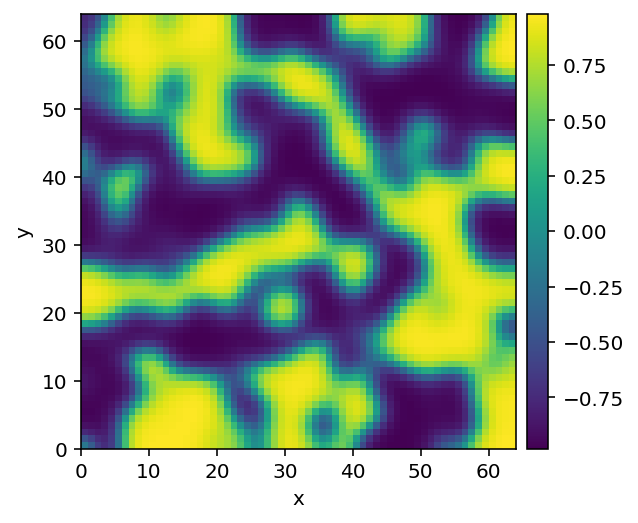

In [8]:
eq = ChafeeInfantePDE()
sol = eq.solve(field, t_range=4, dt=1e-2)
sol.plot(colorbar=True);